In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [16]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [17]:
# Paths to image folders
def_front_path = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front'
ok_front_path = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front'

# Function to load images and create labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(512, 512))  # Adjust target_size
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and create labels
def_front_images, def_front_labels = load_images_from_folder(def_front_path, 0)
ok_front_images, ok_front_labels = load_images_from_folder(ok_front_path, 1)

In [18]:
# Combine and split the data into training and testing sets
images = np.concatenate((def_front_images, ok_front_images), axis=0)
labels = np.concatenate((def_front_labels, ok_front_labels), axis=0)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# Verify the shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (910, 512, 512, 3)
y_train shape: (910,)
x_test shape: (390, 512, 512, 3)
y_test shape: (390,)


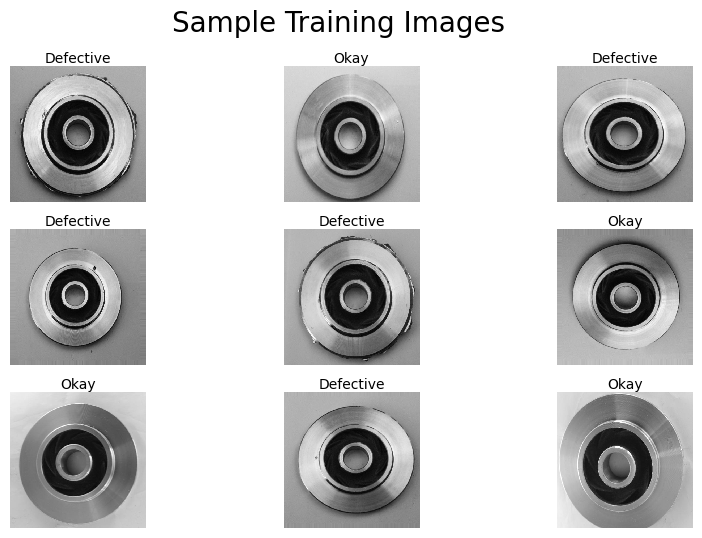

In [20]:
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'Defective', 1: 'Okay'}

fig, axes = plt.subplots(3, 3, figsize=(10, 6))

fig.text(0.5, 0.95, "Sample Training Images", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    label = label_names[y_train[i]]  # Get label name from label_names dictionary
    ax.text(0.5, 1.05, label, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.axis('off')

plt.show()


In [21]:
x_train_flattened = x_train.reshape(len(x_train),512*512*3)
x_test_flattened = x_test.reshape(len(x_test),512*512*3)

In [7]:
import tensorflow.keras as keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(512, 512, 3)),  # Flatten layer to convert 2D image to 1D array
    keras.layers.Dense(384, activation='relu'),
    keras.layers.Dense(256, activation='relu'),  # Increase number of neurons in the Dense layer
    keras.layers.Dense(128, activation='relu'), # Additional Dense layer
    keras.layers.Dense(64, activation='relu'), # Additional Dense layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),# Additional Dense layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
 3/29 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4774 - loss: 16.8796

I0000 00:00:1716282250.083512     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 546ms/step - accuracy: 0.5348 - loss: 15.9376 - val_accuracy: 0.3769 - val_loss: 4.5110
Epoch 2/30


W0000 00:00:1716282265.411564     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5530 - loss: 3.4741 - val_accuracy: 0.7385 - val_loss: 0.7006
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5997 - loss: 1.6926 - val_accuracy: 0.6205 - val_loss: 1.2233
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6260 - loss: 1.1493 - val_accuracy: 0.6231 - val_loss: 1.6981
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6666 - loss: 1.0662 - val_accuracy: 0.6282 - val_loss: 0.7934
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6674 - loss: 0.7198 - val_accuracy: 0.6667 - val_loss: 0.5626
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6116 - loss: 0.9408 - val_accuracy: 0.7718 - val_loss: 0.4805
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6472 - loss: 0.7995 - val_accuracy: 0.7051 - val_loss: 0.7260
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6906 - loss: 0.6969 - val_accuracy: 0.5974 - val_loss: 0

In [26]:
import os
import tensorflow.keras as keras
from tensorflow.keras import layers

# Disable XLA JIT Compilation
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate if needed
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 482ms/step - accuracy: 0.4615 - loss: 0.6996 - val_accuracy: 0.6231 - val_loss: 0.6802
Epoch 2/30


W0000 00:00:1716284531.241904     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5457 - loss: 0.6865 - val_accuracy: 0.6231 - val_loss: 0.6617
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5714 - loss: 0.6875 - val_accuracy: 0.6282 - val_loss: 0.6504
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5500 - loss: 0.6915 - val_accuracy: 0.6231 - val_loss: 0.6680
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.5904 - loss: 0.6759 - val_accuracy: 0.6231 - val_loss: 0.6492
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.5934 - loss: 0.6681 - val_accuracy: 0.6231 - val_loss: 0.6321
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.6081 - loss: 0.6510 - val_accuracy: 0.6282 - val_loss: 0.6197
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.5873 - loss: 0.6451 - val_accuracy: 0.6282 - val_loss: 0.5793
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.6559 - loss: 0.6217 - val_accuracy: 0.6308 - val_

In [27]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8715 - loss: 0.3015


[0.32108524441719055, 0.843589723110199]

In [28]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


W0000 00:00:1716284694.864490     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


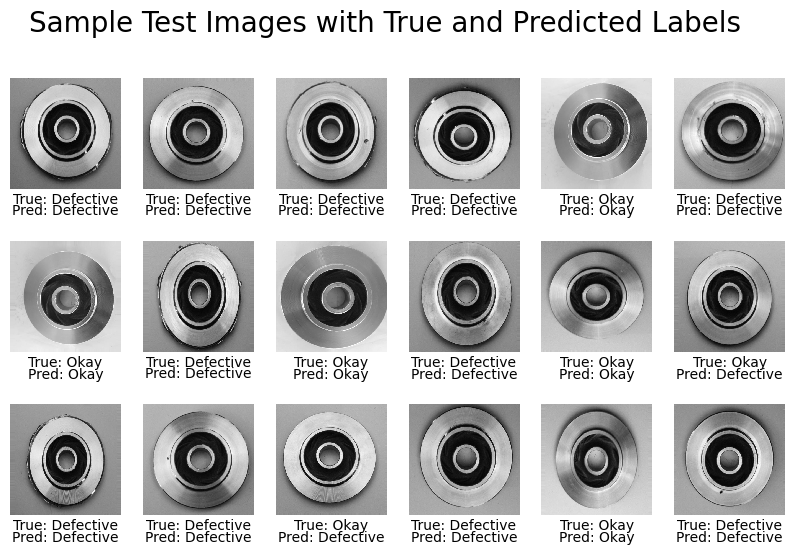

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'Defective', 1: 'Okay'}

# Visualize sample images along with true and predicted labels
fig, axes = plt.subplots(3,6, figsize=(10, 6))
fig.text(0.5, 0.95, "Sample Test Images with True and Predicted Labels", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    # Reshape the flattened image to its original shape (512, 512, 3)
    original_shape_image = x_test_flattened[i].reshape((512, 512, 3))
    
    # Display the test image
    ax.matshow(original_shape_image)
    
    # True label
    true_label = label_names[y_test[i]]  
    # Predicted label
    if y_pred[i] > 0.5:
        pred_label = 'Okay'
    else:
        pred_label = 'Defective'
    
    # Display true and predicted labels
    ax.text(0.5, -0.1, f"True: {true_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, -0.2, f"Pred: {pred_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    ax.axis('off')

plt.show()
